In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [43]:
df = pd.read_csv('iris.csv')

In [44]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
df = df.drop(['Id'], axis=1)

In [46]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
df.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
4.9            3.1           1.5            0.1           Iris-setosa        3
5.8            2.7           5.1            1.9           Iris-virginica     2
               4.0           1.2            0.2           Iris-setosa        1
5.9            3.0           4.2            1.5           Iris-versicolor    1
6.2            3.4           5.4            2.3           Iris-virginica     1
                                                                            ..
5.5            2.3           4.0            1.3           Iris-versicolor    1
               2.4           3.7            1.0           Iris-versicolor    1
                             3.8            1.1           Iris-versicolor    1
               2.5           4.0            1.3           Iris-versicolor    1
7.9            3.8           6.4            2.0           Iris-virginica     1
Name: count, Length: 147, dtype: int64

In [48]:
df.shape

(150, 5)

In [49]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [51]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# EDA

<Axes: >

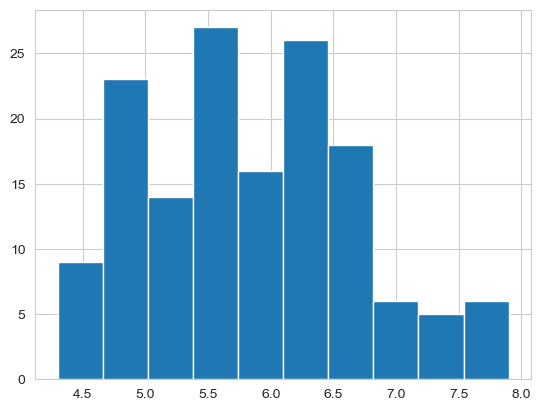

In [52]:
df['SepalLengthCm'].hist()

<Axes: >

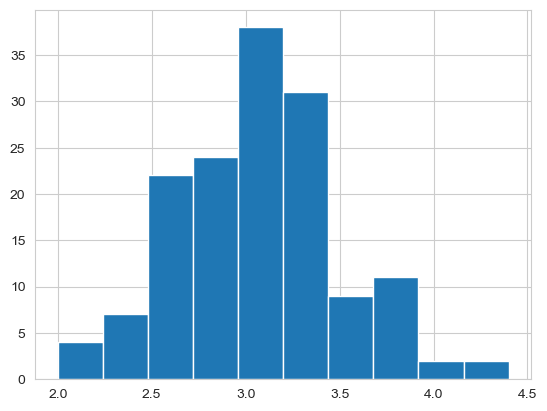

In [53]:
df['SepalWidthCm'].hist()

In [54]:
# scater plot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

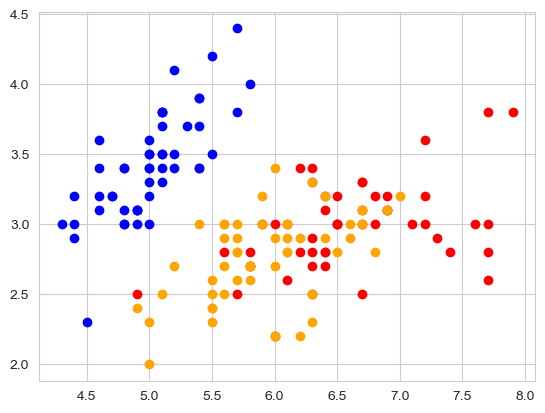

In [55]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])

# scatter plot between each 2 feature

In [56]:
# correlation matrix



# Model 

In [57]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df.drop('Species',axis=1)
y = df['Species']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)  # Train the model


KNeighborsClassifier()

In [61]:
y_pred = knn.predict(X_test)


In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [63]:
import pickle
filename = 'iris_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [64]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [65]:
load_model = pickle.load(open(filename, 'rb'))

In [66]:
load_model.predict([[6.0,2.2,4.0,1.0]])

c:\Users\somai\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)